In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


In [3]:
cat_data=[]
class_data=[]
for i in range(1,3):
    cat_data.append(train_data[train_labels==i])
    class_data.append(train_labels[train_labels==i])
dat=np.concatenate((cat_data[0],cat_data[1]))
label=np.concatenate((class_data[0],class_data[1]))
t_data=[]
s_data=[]
for i in range(1,3):
    t_data.append(test_data[test_labels==i])
    s_data.append(test_labels[test_labels==i])
test=np.concatenate((t_data[0],t_data[1]))
t_label=np.concatenate((s_data[0],s_data[1]))

In [8]:
from sklearn.svm import SVC
def svc(c):
    clf=SVC(C=c)
    clf.fit(dat,label)
    return clf.score(test,t_label)
print('Accuracy for C:', svc(0.00000000003))
print('Accuracy for C:', svc(1000000000000))

Accuracy for C: 0.955
Accuracy for C: 0.965


In [11]:
from numpy import linalg as LA
covar=np.cov(dat, rowvar=False)
eigv, ev= LA.eig(covar)
new_data=dat @ ev[:,0:2].real
clf=SVC(kernel='linear')
clf.fit(new_data,label)
w_log = clf.coef_[0]
bias = clf.intercept_[0]
xl = np.arange(-1000,1000,0.1)
yl = -1*(w_log[0]*xl+bias)/w_log[1]

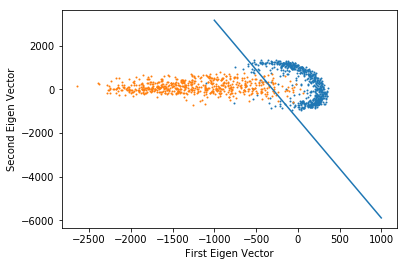

In [12]:
plt.scatter(new_data[0:600,0],new_data[0:600,1],s=1)
plt.scatter(new_data[600:1200,0],new_data[600:1200,1],s=1)
plt.plot(xl,yl)
plt.xlabel('First Eigen Vector')
plt.ylabel('Second Eigen Vector')
plt.show()

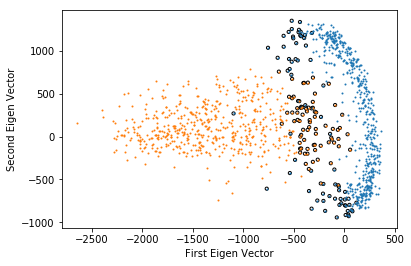

In [7]:
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=10,linewidth=1, facecolors='none', edgecolors='k')
plt.scatter(new_data[0:600,0],new_data[0:600,1],s=1)
plt.scatter(new_data[600:1200,0],new_data[600:1200,1],s=1)
plt.xlabel('First Eigen Vector')
plt.ylabel('Second Eigen Vector')
plt.show()